# **Definindo uma Arquitetura no Pytorch**

Carregando os dados

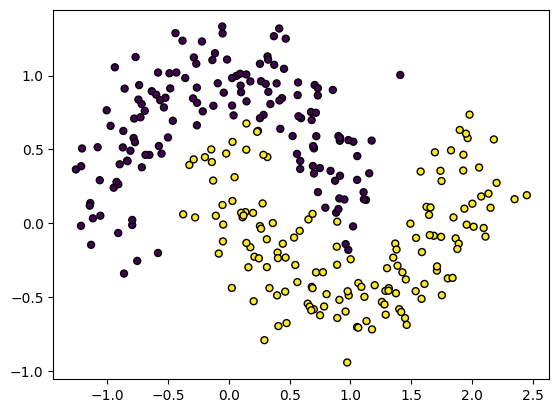

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:,0], X1[:,1], marker='o', c=Y1, s=25, edgecolor = 'k')

# nn.Sequential

In [2]:
import torch
from torch import nn #neural networks

input_size = 2 #Coordenadas x(x1) e y(x2), dois dados de entrada
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features = input_size , out_features=hidden_size),#hidden(escondida)
                    nn.ReLU(),  # ativação não-linear
                    nn.Linear(in_features=hidden_size, out_features=output_size))# output (saída)

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


O módulo summary permite visualizar mais informações sobre a nossa rede, como quantidade de parâmetros e o tamanho que cada elemento ocupa na memória

In [3]:
from torchsummary import summary
summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Forward

In [4]:
#A minha entrada tem 300 amostras com 2 dimensões
print(X1.shape)
#Nosso dado é um array do numpy
#Deve converter para float 32
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
#Após passar pela minha rede, tranformou-se em 300 predições e somente 1 dimensão, ou seja, o resultado
print(pred.size())

(300, 2)
torch.Size([300, 1])


# Class nn.Module

In [5]:
class MinhaRede(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()

    #Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, X):

    #Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output

# Instanciando a Rede

In [6]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size, hidden_size, output_size)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


# Forward

In [7]:
#A minha entrada tem 300 amostras com 2 dimensões
print(X1.shape)
#Nosso dado é um array do numpy
#Deve converter para float 32
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
#Após passar pela minha rede, tranformou-se em 300 predições e somente 1 dimensão, ou seja, o resultado
print(pred.size())

(300, 2)
torch.Size([300, 1])


# Subindo Informações na GPU

In [8]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cpu


In [9]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size, hidden_size, output_size)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [10]:
#A minha entrada tem 300 amostras com 2 dimensões
print(X1.shape)
#Nosso dado é um array do numpy
#Deve converter para float 32
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])
